In [33]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [34]:
class KNNRegressor:
    def __init__(self, k:int) -> None:
        if k <= 0 or not isinstance(k, int):
            raise ValueError('k must be a positive integer')
            
        self.k = k
        
    def fit(self, x, y) -> 'KNNRegressor':
        self.x = x
        self.y = y
        
        return self
    
    def predict(self, points):
        predicted_values = []
        
        for point in points:
            distances = np.linalg.norm(self.x - point, axis=1)
            neigbors_indexes = distances.argsort()[:self.k]
            neigbors_values = self.y[neigbors_indexes]
            
            predicted_values.append(np.mean(neigbors_values))
            
        return np.array(predicted_values)

In [35]:
X, y = make_regression(n_samples = 1000, n_features=2, n_informative=2, n_targets=1)

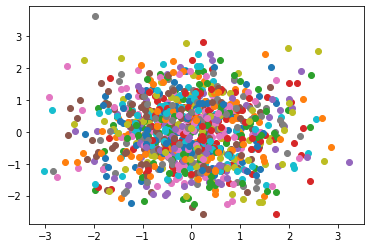

In [36]:
for point in X:
    plt.scatter(*point)

In [37]:
X.shape, y.shape

((1000, 2), (1000,))

In [38]:
my_instance = KNNRegressor(3).fit(X, y)

In [39]:
instance = KNeighborsRegressor(n_neighbors=3).fit(X, y)

In [40]:
test_x = np.linspace(-2, 4, 100)
test_y = np.linspace(-4, 3, 100)

In [44]:
test_points = [np.array([test_x[i], test_y[i]]) for i in range(len(test_x))]
np.random.shuffle(test_points)

In [45]:
predictions = instance.predict(test_points)

In [46]:
my_predictions = my_instance.predict(test_points)

In [47]:
(predictions == my_predictions).all()

True